# Code for article "HIV treatment planning on a case-by-case basis", Marios M. Hadjiandreou, Raul Conejeros, and Ian Wilson.

In [9]:
# https://publications.waset.org/8527/hiv-treatment-planning-on-a-case-by-case-basis
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import math


In [2]:
def hiv_expanded(x,t,s_1, s_2, s_3, p_1, p_2, S_1, S_2, k_1, k_2, k_3, k_4, k_5, k_6, k_7, k_8, k_9, k_10, k_11, k_12,\
                 delta_1, delta_2, delta_3, delta_4, delta_5, delta_6, delta_7, alpha_1, psi, fi, r, T_max, f_1, f_2,\
                 D_1, D_2, D_3, k_alpha_1, k_alpha_2, k_alpha_3, Cl_1, Cl_2,Cl_3,\
                 V_c1, V_c2, V_c3, F_1, F_2, F_3, IC_50_1,IC_50_2,IC_50_3, t_l, nu):


    
#     define system
    T=x[0]
    T_1=x[1]
    T_2=x[2]
    T_L1=x[3]
    T_L2=x[4]
    M=x[5]
    M_1=x[6]
    M_2=x[7]
    CTL=x[8]
    V_1=x[9]
    V_2=x[10]

    
    k_e1=Cl_1/V_c1
    k_e2=Cl_2/V_c2
    k_e3=Cl_3/V_c3
    C_1=F_1*D_1/V_c1*k_alpha_1/(k_alpha_1+k_e1)*(math.exp(-k_e1*(t-t_l))-math.exp(-k_alpha_1*(t-t_l)))
    C_2=F_2*D_2/V_c2*k_alpha_2/(k_alpha_2+k_e2)*(math.exp(-k_e2*(t-t_l))-math.exp(-k_alpha_2*(t-t_l)))
    C_3=F_3*D_3/V_c3*k_alpha_3/(k_alpha_1+k_e3)*(math.exp(-k_e3*(t-t_l))-math.exp(-k_alpha_3*(t-t_l)))
    u_1=((C_2/IC_50_2)+(C_3/IC_50_3))/(1+(C_2/IC_50_2)+(C_3/IC_50_3))
    u_2=C_1/(C_1+IC_50_1)
    
 

    dTdt=s_1+p_1*(V_1+V_2)*T/(V_1+V_2+S_1)-(1-u_1)*(k_1*V_1+k_2*M_1)*T-fi*(k_1*V_2+k_2*M_2)*T+\
    r*T*(1-(T+T_1+T_2+T_L1+T_L2)/T_max)-delta_1*T
    
    
    
    #latently infected LT1
    dT_L1dt=(1-u_1)*psi*(k_1*V_1+k_2*M_1)*T-alpha_1*T_L1-delta_3*T_L1
    dT_L2dt=(1-psi)*fi*(k_1*V_2+k_2*M_2)*T-alpha_1*T_L2-delta_3*T_L2
    
    
    #actively infected cells
    dT_1dt=(1-u_1)*psi*(k_1*V_1+k_2*M_1)*T+alpha_1*T_L1-delta_2*T_1-k_3*T_1*CTL
    dT_2dt=psi*fi*(k_1*V_2+k_2*M_2)*T+ alpha_1*T_L2-delta_2*T_2-k_3*T_2*CTL

    
    #macrophages
    dMdt=s_2+p_2*(V_1+V_2)*M/(V_1+V_2+S_2)-(1-f_1*u_1)*k_4*V_1*M-fi*k_4*V_2*M-delta_4*M
    dM_1dt=(1-f_1*u_1)*k_4*V_1*M-delta_5*M_1-k_5*M_1*CTL
    dM_2dt=fi*k_4*V_2*M-delta_5*M_2-k_5*M_2*CTL
    
    
    dCTLdt=s_3+k_6*(T_1+T_2)*CTL+k_7*(M_1+M_2)*CTL-delta_6*CTL
    
#     viruses
    dV_1dt=(1-u_2)*(1-nu)*k_8*T_1+(1-f_2*u_2)*(1-nu)*k_9*M_1+nu*fi*k_8*T_2+nu*fi*k_9*M_2-\
            (k_10*T+k_11*M)*V_1-k_12*V_1*M-delta_7*V_1
    dV_2dt=(1-u_2)*nu*k_8*T_1+(1-f_2*u_2)*nu*k_9*M_1+(1-nu)*fi*k_8*T_2+(1-nu)*fi*k_9*M_2-\
            (k_10*T+k_11*M)*V_2-k_12*V_2*M-delta_7*V_2

    
    return [dTdt, dT_1dt, dT_2dt, dT_L1dt, dT_L2dt, dMdt, dM_1dt,dM_2dt,dCTLdt, dV_1dt, dV_2dt]

# initial condition
x0 = [1000,0,0,0,0, 30,0,0,333, 0.001, 0]


# constants
s_1=10
s_2=0.15
s_3=5
p_1=0.16
p_2=0.15
S_1=55.6
S_2=188
k_1=0.00387
k_2=0.000001
k_3=0.00045
k_4=0.000522
k_5=0.000003
k_6=0.00033
k_7=0.000000006
k_8=0.537
k_9=0.285
k_10=0.00000779
k_11=0.000001  
k_12=0.00004
delta_1=0.02
delta_2=0.28
delta_3=0.05
delta_4=0.005
delta_5=0.005
delta_6=0.015
delta_7=2.39
alpha_1=0.0003
nu=0.001
psi=0.97
fi=0.9
s_2=0.15
p_2=0.15
f_1=0.34
f_2=0.34


D_1=600
D_2=150
D_3=300
k_alpha_1=2.4
k_alpha_2=12
k_alpha_3=12
Cl_1=14800
Cl_2=560
Cl_3=2690
V_c1=28.7
V_c2=91
V_c3=112
F_1=1.0
F_2=0.86
F_3=0.64
IC_50_1=0.11
IC_50_2=0.34
IC_50_3=0.13
# drugs initiate at first moment t=0
t_l=0
r=0.03
T_max=1500
# time points in days
t = np.linspace(0,3500)


In [3]:

# solve ODE
x = odeint(hiv_expanded, x0, t, args=(s_1, s_2, s_3, p_1, p_2, S_1, S_2, k_1, k_2, k_3, k_4, k_5, k_6, k_7, k_8, k_9,\
                                      k_10, k_11, k_12,\
                 delta_1, delta_2, delta_3, delta_4, delta_5, delta_6, delta_7, alpha_1, psi, fi, r, T_max, f_1, f_2,\
                 D_1, D_2, D_3, k_alpha_1, k_alpha_2, k_alpha_3, Cl_1, Cl_2,Cl_3,\
                 V_c1, V_c2, V_c3, F_1, F_2, F_3, IC_50_1,IC_50_2,IC_50_3, t_l, nu))

In [4]:
# get solution
T=x[:,0]
T_1=x[:,1]
T_2=x[:,2]
T_L1=x[:,3]
T_L2=x[:,4]
M=x[:,5]
M_1=x[:,6]
M_2=x[:,7]
CTL=x[:,8]
V_1=x[:,9]
V_2=x[:,10]

# get list from it
values=[]
values=[T,T_1, T_2, T_L1, T_L2, M, M_1, M_2, CTL, V_1, V_2 ]
titles=['healthy T4 cells', 'latently_infected_by wild type T4 cells', 'latently_infected_by mutated type T4 cells', \
        'actively_infected_by wild type T4 cells', 'actively_infected_by mutated type T4 cells', \
        'healthy macrophages', 'infected by wild-type macrophages',  'infected by mutated-type macrophages',\
        'cytotoxic cells', 'wild type virus', 'mutated type virus']

### In logarithmic scale

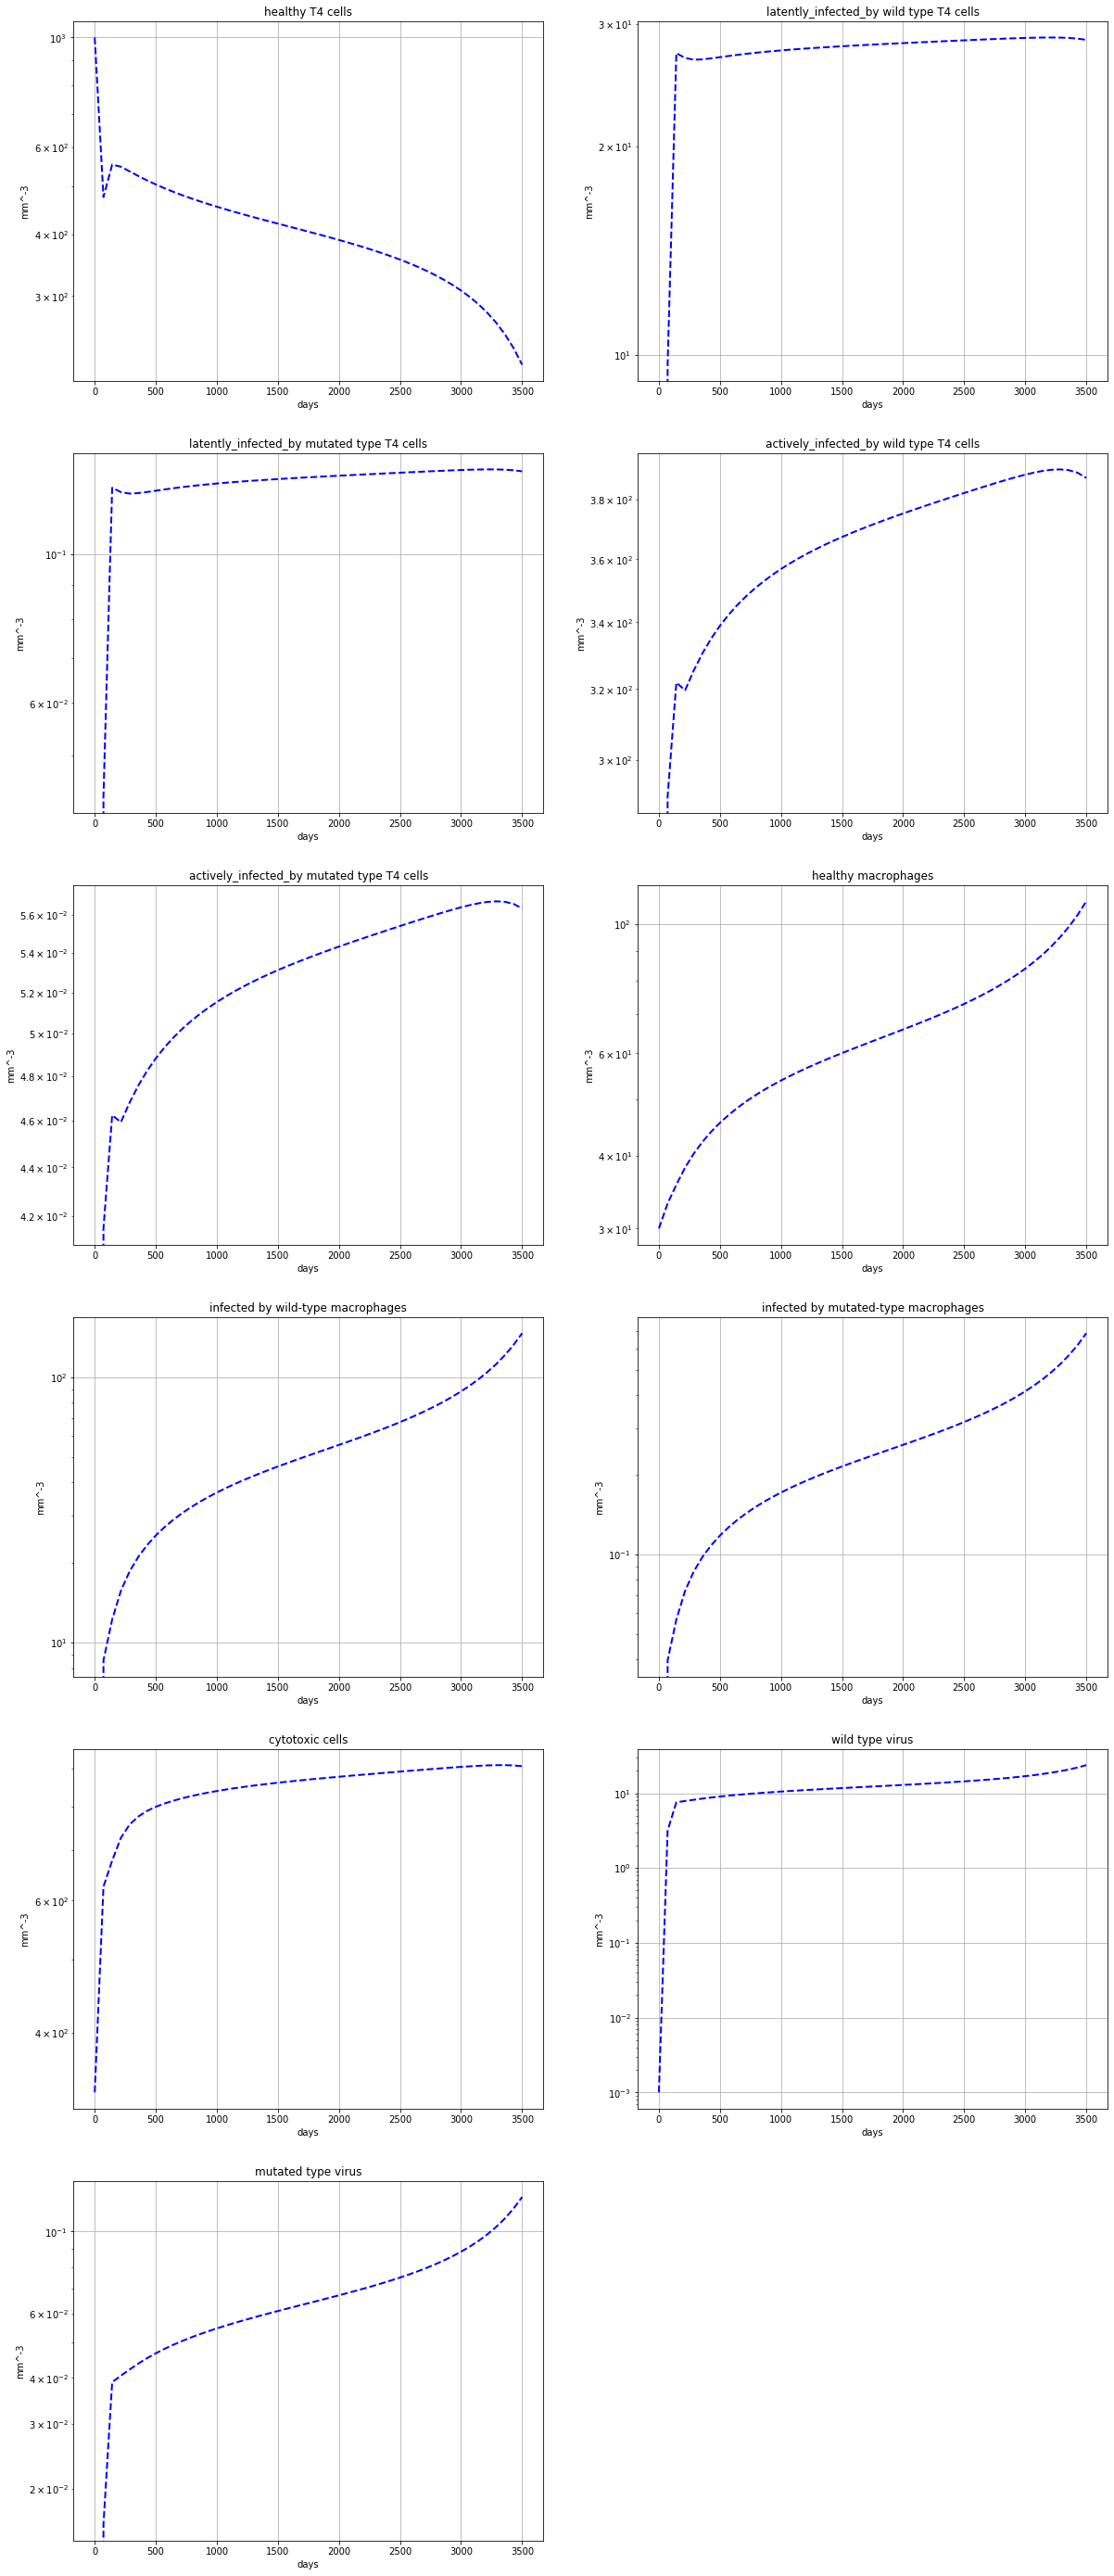

In [5]:
import matplotlib.pyplot as plt
# Импортируем один из пакетов Matplotlib
import pylab
from pylab import rcParams
rcParams['figure.figsize'] = 20, 50

# Импортируем пакет со вспомогательными функциями
from matplotlib import mlab

for i in range(len(values)):
    pylab.subplot (6, 2, i+1)
    pylab.semilogy(t,values[i],'b--',linewidth=2,label=titles[i])
    pylab.grid()
    pylab.ylabel('mm^-3')
    pylab.xlabel('days')
    pylab.title (titles[i])

# Покажем окно с нарисованным графиком
pylab.show()


### In usual scale

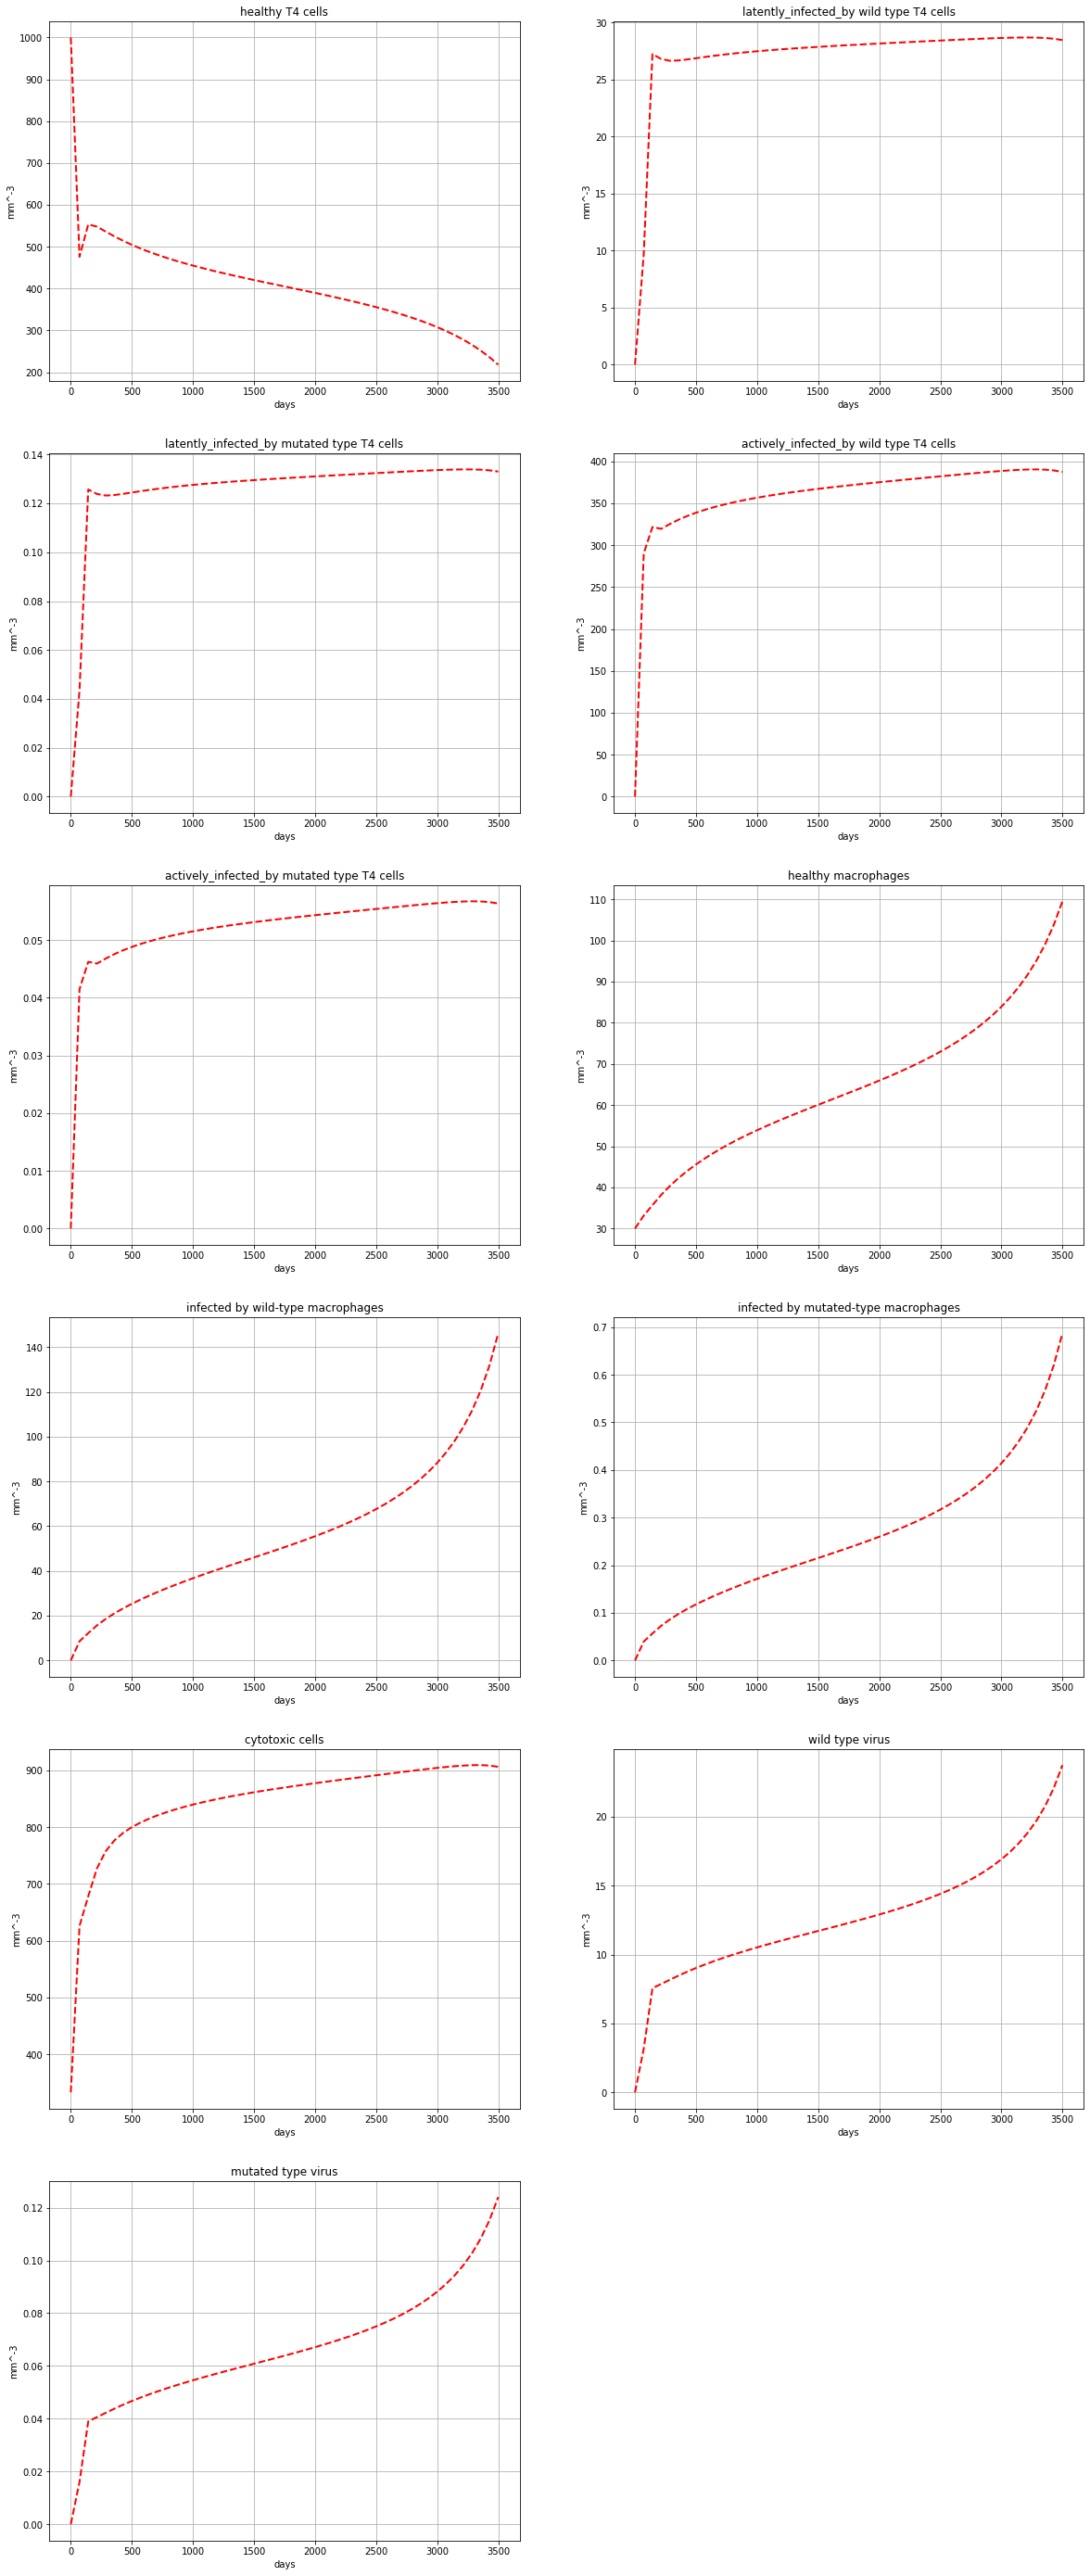

In [6]:

for i in range(len(values)):
    pylab.subplot (6, 2, i+1)
    pylab.plot(t,values[i],'r--',linewidth=2,label=titles[i])
    pylab.grid()
    pylab.ylabel('mm^-3')
    pylab.xlabel('days')
    pylab.title (titles[i])

# Покажем окно с нарисованным графиком
pylab.show()